In [90]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [91]:
# Universe of discourse
depth_dip = ctrl.Antecedent(np.arange(0, 3001, 1), 'Depth of Dip (ppm)')
duration_dip = ctrl.Antecedent(np.arange(0, 7, 0.1), 'Duration of Dip (hours)')
interval_dips = ctrl.Antecedent(np.arange(0, 7, 0.1), 'Interval Between Dips (days)')
exoplanet_likelihood = ctrl.Consequent(np.arange(0, 1.1, 0.01), 'Exoplanet Likelihood')

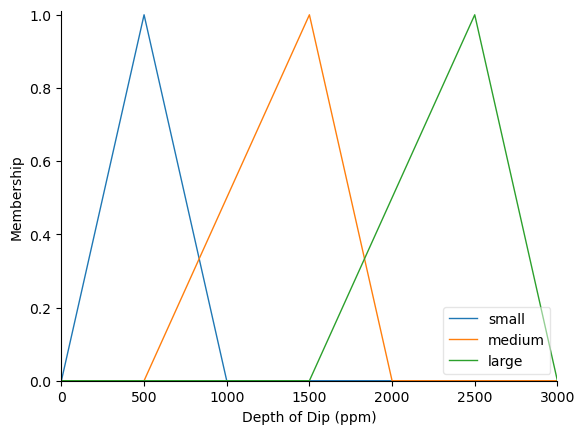

In [92]:
# Linguistic variables
depth_dip['small'] = fuzz.trimf(depth_dip.universe, [0, 500, 1000])
depth_dip['medium'] = fuzz.trimf(depth_dip.universe, [500, 1500, 2000])
depth_dip['large'] = fuzz.trimf(depth_dip.universe, [1500, 2500, 3000])
depth_dip.view()
plt.show()

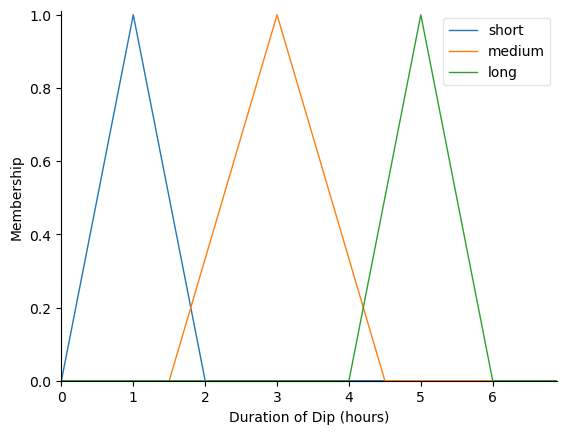

In [93]:
duration_dip['short'] = fuzz.trimf(duration_dip.universe, [0, 1, 2])
duration_dip['medium'] = fuzz.trimf(duration_dip.universe, [1.5, 3, 4.5])
duration_dip['long'] = fuzz.trimf(duration_dip.universe, [4, 5, 6])
duration_dip.view()
plt.show()

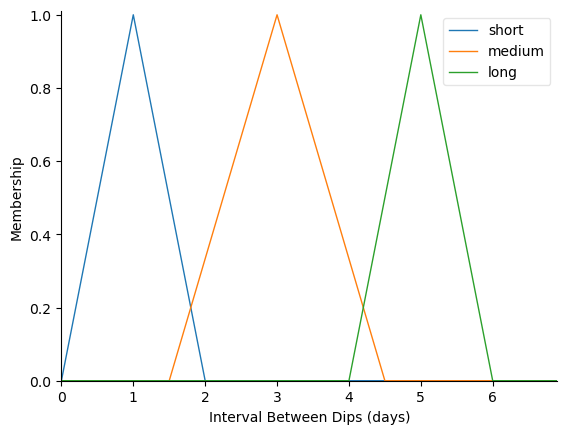

In [94]:
interval_dips['short'] = fuzz.trimf(interval_dips.universe, [0, 1, 2])
interval_dips['medium'] = fuzz.trimf(interval_dips.universe, [1.5, 3, 4.5])
interval_dips['long'] = fuzz.trimf(interval_dips.universe, [4, 5, 6])
interval_dips.view()
plt.show()

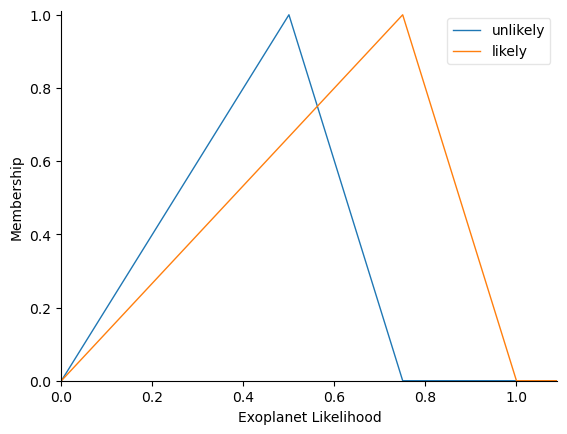

In [95]:
exoplanet_likelihood['unlikely'] = fuzz.trimf(exoplanet_likelihood.universe,[0, 0.5 ,0.75])
exoplanet_likelihood['likely'] = fuzz.trimf(exoplanet_likelihood.universe,[0 ,0.75 ,1])
exoplanet_likelihood.view()
plt.show()

In [96]:
# Rules
rule1 = ctrl.Rule(depth_dip['large'] & duration_dip['long'] & interval_dips['medium'], exoplanet_likelihood['likely'])
rule2 = ctrl.Rule(depth_dip['small'] & duration_dip['short'] & interval_dips['long'], exoplanet_likelihood['unlikely'])
rule3 = ctrl.Rule(depth_dip['medium'] & duration_dip['medium'] & interval_dips['medium'], exoplanet_likelihood['likely'])
rule4 = ctrl.Rule(depth_dip['large'] & duration_dip['short'] & interval_dips['short'], exoplanet_likelihood['unlikely'])
rule5 = ctrl.Rule(depth_dip['medium'] & duration_dip['medium'] & interval_dips['short'], exoplanet_likelihood['likely'])
rule6 = ctrl.Rule(depth_dip['large'] & duration_dip['medium'] & interval_dips['medium'], exoplanet_likelihood['likely'])
rule7 = ctrl.Rule(depth_dip['small'] & duration_dip['long'] & interval_dips['short'], exoplanet_likelihood['unlikely'])
rule8 = ctrl.Rule(depth_dip['medium'] & duration_dip['short'] & interval_dips['long'], exoplanet_likelihood['unlikely'])
rule9 = ctrl.Rule(depth_dip['small'] & duration_dip['medium'] & interval_dips['short'], exoplanet_likelihood['unlikely'])
rule10 = ctrl.Rule(depth_dip['medium'] & duration_dip['long'] & interval_dips['medium'], exoplanet_likelihood['likely'])
rule11 = ctrl.Rule(depth_dip['large'] & duration_dip['long'] & interval_dips['long'], exoplanet_likelihood['likely'])
rule12 = ctrl.Rule(depth_dip['small'] & duration_dip['short'] & interval_dips['medium'], exoplanet_likelihood['unlikely'])
rule13 = ctrl.Rule(depth_dip['large'] & duration_dip['medium'] & interval_dips['long'], exoplanet_likelihood['likely'])
rule14 = ctrl.Rule(depth_dip['small'] & duration_dip['long'] & interval_dips['medium'], exoplanet_likelihood['unlikely'])
rule15 = ctrl.Rule(depth_dip['medium'] & duration_dip['short'] & interval_dips['medium'], exoplanet_likelihood['unlikely'])
rule16 = ctrl.Rule(depth_dip['medium'] & duration_dip['long'] & interval_dips['short'], exoplanet_likelihood['likely'])
rule17 = ctrl.Rule(depth_dip['small'] & duration_dip['medium'] & interval_dips['long'], exoplanet_likelihood['unlikely'])
rule18 = ctrl.Rule(depth_dip['large'] & duration_dip['short'] & interval_dips['medium'], exoplanet_likelihood['likely'])
rule19 = ctrl.Rule(depth_dip['small'] & duration_dip['short'] & interval_dips['short'], exoplanet_likelihood['unlikely'])
rule20 = ctrl.Rule(depth_dip['small'] & duration_dip['long'] & interval_dips['long'], exoplanet_likelihood['unlikely'])
rule21 = ctrl.Rule(depth_dip['medium'] & duration_dip['short'] & interval_dips['short'], exoplanet_likelihood['unlikely'])
rule22 = ctrl.Rule(depth_dip['medium'] & duration_dip['long'] & interval_dips['long'], exoplanet_likelihood['likely'])
rule23 = ctrl.Rule(depth_dip['large'] & duration_dip['short'] & interval_dips['long'], exoplanet_likelihood['likely'])
rule24 = ctrl.Rule(depth_dip['large'] & duration_dip['medium'] & interval_dips['short'], exoplanet_likelihood['likely'])
rule25 = ctrl.Rule(depth_dip['large'] & duration_dip['long'] & interval_dips['short'], exoplanet_likelihood['likely'])
rule26 = ctrl.Rule(depth_dip['medium'] & duration_dip['medium'] & interval_dips['long'], exoplanet_likelihood['likely'])
rule27 = ctrl.Rule(depth_dip['medium'] & duration_dip['medium'] & interval_dips['short'], exoplanet_likelihood['likely'])

In [97]:
# Control system
exoplanet_ctrl = ctrl.ControlSystem([
    rule1 , rule2 , rule3 , 
    rule4 , rule5 , rule6 , 
    rule7 , rule8 , rule9 , 
    rule10 , rule11 , rule12 ,
    rule13 , rule14 , rule15 ,
    rule16 , rule17 , rule18 , 
    rule19 , rule20 , rule21 ,
    rule22 , rule23 , rule24 ,
    rule25 , rule26 , rule27 ,
])

0.0


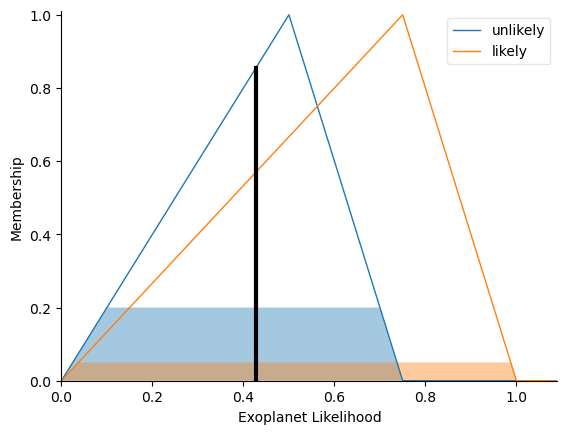

In [98]:
# Simulation
exoplanet_simulator = ctrl.ControlSystemSimulation(exoplanet_ctrl)

# Inputs
exoplanet_simulator.input["Depth of Dip (ppm)"] = 550
exoplanet_simulator.input["Duration of Dip (hours)"] = 4.2
exoplanet_simulator.input["Interval Between Dips (days)"] = 1

# Compute
exoplanet_simulator.compute()

# Output
print(round(exoplanet_simulator.output['Exoplanet Likelihood'], 0))
exoplanet_likelihood.view(sim=exoplanet_simulator)
plt.show()